# Time series

In [47]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

## Date and Time Data Types and Tools

In [3]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2017, 9, 26, 20, 20, 57, 811703)

In [5]:
now.year

2017

In [4]:
now.year, now.month, now.day

(2017, 9, 26)

In [20]:
#マイクロ秒精度
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15,1,1)
delta

datetime.timedelta(926, 56698, 999999)

In [16]:
delta.days

926

In [17]:
delta.seconds

56689

In [18]:
delta.microseconds

999990

In [25]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(hours=12)

datetime.datetime(2011, 1, 7, 12, 0)

In [26]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between string and datetime

In [27]:
stamp = datetime(2011, 1, 3)

In [28]:
str(stamp)

'2011-01-03 00:00:00'

In [29]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [38]:
value = '2011-12-02'
print(datetime.strptime(value, '%Y-%m-%d'))

2011-12-02 00:00:00


In [39]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [41]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [42]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [44]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [45]:
datestrs

['7/6/2011', '8/6/2011']

In [48]:
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [49]:
print(pd.to_datetime(datestrs))
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)


In [50]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [51]:
idx[2]

NaT

In [24]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## Time Series Basics

In [59]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.224170
2011-01-05    0.604159
2011-01-07   -0.434977
2011-01-08    1.358735
2011-01-10   -0.225510
2011-01-12   -1.711747
dtype: float64

In [61]:
ts.name='open'
ts

2011-01-02   -0.224170
2011-01-05    0.604159
2011-01-07   -0.434977
2011-01-08    1.358735
2011-01-10   -0.225510
2011-01-12   -1.711747
Name: open, dtype: float64

In [62]:
type(ts)
# note: output changed to "pandas.core.series.Series"

pandas.core.series.Series

In [66]:
ts.index[0].year

2011

In [68]:
ts + ts[::2]

2011-01-02   -0.448340
2011-01-05         NaN
2011-01-07   -0.869955
2011-01-08         NaN
2011-01-10   -0.451020
2011-01-12         NaN
Name: open, dtype: float64

In [70]:
ts[1:5:2]

2011-01-05    0.604159
2011-01-08    1.358735
Name: open, dtype: float64

In [71]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype. General dtypes map to specific dtypes, but may be different from one installation of NumPy to the next.

On a machine whose byte order is little endian, there is no difference between np.dtype('datetime64[ns]') and np.dtype('<M8[ns]'):

In [6]: np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')
Out[6]: True
However, on a big endian machine, np.dtype('datetime64[ns]') would equal np.dtype('>M8[ns]').

So datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the endian-ness of the machine.

There are many other similar examples of general dtypes mapping to specific dtypes: int64 maps to <i8 or >i8, and int maps to either int32 or int64 depending on the bit architecture of the OS and how NumPy was compiled.

In [72]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting

In [73]:
stamp = ts.index[2]
ts[stamp]

-0.43497749699985244

In [79]:
ts['1/10/2011']

-0.22551009499839761

In [80]:
ts['20110110']

-0.22551009499839761

In [81]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.216482
2000-01-02   -0.206419
2000-01-03    0.597791
2000-01-04   -0.078510
2000-01-05   -0.166585
2000-01-06    0.138450
                ...   
2002-09-21    1.191992
2002-09-22    1.575422
2002-09-23    0.460140
2002-09-24   -0.367450
2002-09-25    0.971620
2002-09-26    1.317102
Freq: D, Length: 1000, dtype: float64

In [82]:
longer_ts['2001']

2001-01-01   -0.237535
2001-01-02   -0.970555
2001-01-03   -0.970836
2001-01-04   -0.168598
2001-01-05   -1.222674
2001-01-06    1.566227
                ...   
2001-12-26   -0.017576
2001-12-27    0.431918
2001-12-28    0.642145
2001-12-29   -0.078381
2001-12-30    0.151324
2001-12-31    0.716790
Freq: D, Length: 365, dtype: float64

In [83]:
longer_ts['2001-05']

2001-05-01    0.803177
2001-05-02   -1.368363
2001-05-03   -0.495962
2001-05-04   -0.739859
2001-05-05    1.260211
2001-05-06    1.979246
                ...   
2001-05-26    0.162601
2001-05-27    1.062941
2001-05-28    1.333402
2001-05-29    0.128928
2001-05-30    1.972943
2001-05-31   -0.612996
Freq: D, Length: 31, dtype: float64

In [84]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.434977
2011-01-08    1.358735
2011-01-10   -0.225510
2011-01-12   -1.711747
Name: open, dtype: float64

In [85]:
ts

2011-01-02   -0.224170
2011-01-05    0.604159
2011-01-07   -0.434977
2011-01-08    1.358735
2011-01-10   -0.225510
2011-01-12   -1.711747
Name: open, dtype: float64

In [86]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.434977
2011-01-08    1.358735
2011-01-10   -0.225510
Name: open, dtype: float64

In [87]:
ts.truncate(before='1/9/2011')

2011-01-10   -0.225510
2011-01-12   -1.711747
Name: open, dtype: float64

In [89]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.700438,0.331199,0.069046,1.606866
2001-05-09,-1.339531,-1.392180,-0.824385,0.109138
2001-05-16,0.142889,0.331968,-1.947523,-1.673663
2001-05-23,1.067615,-2.201387,-1.812467,0.210408
2001-05-30,1.961860,-0.290214,0.637040,-2.428549


### Time series with duplicate indices

In [90]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [91]:
dup_ts.index.is_unique

False

In [92]:
dup_ts['1/3/2000']  # not duplicated

4

In [93]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [98]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [99]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

level : int, level name, or sequence of such, default None
If the axis is a MultiIndex (hierarchical), group by a particular level or levels

In [55]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, Frequencies, and Shifting

In [100]:
ts

2011-01-02   -0.224170
2011-01-05    0.604159
2011-01-07   -0.434977
2011-01-08    1.358735
2011-01-10   -0.225510
2011-01-12   -1.711747
Name: open, dtype: float64

In [103]:
ts.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### Generating date ranges

In [59]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [104]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [105]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [108]:
pd.date_range('1/1/2000', '12/1/2000', freq='B')

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2000-11-20', '2000-11-21', '2000-11-22', '2000-11-23',
               '2000-11-24', '2000-11-27', '2000-11-28', '2000-11-29',
               '2000-11-30', '2000-12-01'],
              dtype='datetime64[ns]', length=240, freq='B')

In [109]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [110]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In the preceding examples, we created DatetimeIndex objects at various frequencies by passing in frequency strings like ‘M’, ‘W’, and ‘BM to the freq keyword. Under the hood, these frequency strings are being translated into an instance of pandas DateOffset, which represents a regular frequency increment. Specific offset logic like “month”, “business day”, or “one hour” is represented in its various subclasses.

<pre>
Class name	Description  
DateOffset	Generic offset class, defaults to 1 calendar day
BDay	business day (weekday)
CDay	custom business day (experimental)
Week	one week, optionally anchored on a day of the week
WeekOfMonth	the x-th day of the y-th week of each month
LastWeekOfMonth	the x-th day of the last week of each month
MonthEnd	calendar month end
MonthBegin	calendar month begin
BMonthEnd	business month end
BMonthBegin	business month begin
CBMonthEnd	custom business month end
CBMonthBegin	custom business month begin
SemiMonthEnd	15th (or other day_of_month) and calendar month end
SemiMonthBegin	15th (or other day_of_month) and calendar month begin
QuarterEnd	calendar quarter end
QuarterBegin	calendar quarter begin
BQuarterEnd	business quarter end
BQuarterBegin	business quarter begin
FY5253Quarter	retail (aka 52-53 week) quarter
YearEnd	calendar year end
YearBegin	calendar year begin
BYearEnd	business year end
BYearBegin	business year begin
FY5253	retail (aka 52-53 week) year
BusinessHour	business hour
CustomBusinessHour	custom business hour
Hour	one hour
Minute	one minute
Second	one second
Milli	one millisecond
Micro	one microsecond
Nano	one nanosecond
</pre>

In [115]:
from pandas.tseries.offsets import Hour, Minute,BDay 
hour = Hour()
hour

<Hour>

In [116]:
from pandas.tseries.offsets import Hour, Minute,BDay 
b = BDay()
b

<BusinessDay>

In [117]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [67]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [114]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq=four_hours)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [118]:
Hour(2) + Minute(30)

<150 * Minutes>

In [122]:
pd.date_range('1/1/2000', periods=10, freq='10D')

DatetimeIndex(['2000-01-01', '2000-01-11', '2000-01-21', '2000-01-31',
               '2000-02-10', '2000-02-20', '2000-03-01', '2000-03-11',
               '2000-03-21', '2000-03-31'],
              dtype='datetime64[ns]', freq='10D')

#### Week of month dates

In [124]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (leading and lagging) data

In [132]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.612841
2000-02-29   -0.250645
2000-03-31    1.360395
2000-04-30   -0.859194
Freq: M, dtype: float64

In [126]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.999174
2000-04-30    0.779953
Freq: M, dtype: float64

In [127]:
ts.shift(-2)

2000-01-31   -1.353510
2000-02-29    1.045464
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [129]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.219402
2000-03-31   -2.735374
2000-04-30   -1.772410
Freq: M, dtype: float64

In [130]:
ts.pct_change()

2000-01-31         NaN
2000-02-29   -0.219402
2000-03-31   -2.735374
2000-04-30   -1.772410
Freq: M, dtype: float64

In [133]:
ts.shift(2, freq='M')

2000-03-31   -0.612841
2000-04-30   -0.250645
2000-05-31    1.360395
2000-06-30   -0.859194
Freq: M, dtype: float64

In [134]:
ts.shift(3, freq='D')

2000-02-03   -0.612841
2000-03-03   -0.250645
2000-04-03    1.360395
2000-05-03   -0.859194
dtype: float64

In [135]:
ts.shift(1, freq='3D')

2000-02-03   -0.612841
2000-03-03   -0.250645
2000-04-03    1.360395
2000-05-03   -0.859194
dtype: float64

In [136]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.612841
2000-02-29 01:30:00   -0.250645
2000-03-31 01:30:00    1.360395
2000-04-30 01:30:00   -0.859194
Freq: M, dtype: float64

#### Shifting dates with offsets

In [137]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [138]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [139]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [144]:
offset = MonthEnd()


<MonthEnd>


In [140]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [145]:
MonthEnd().rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [146]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [149]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.158662
2000-02-29   -0.268464
2000-03-31    0.038122
dtype: float64

In [150]:
ts.resample('M', how='mean')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01-31   -0.158662
2000-02-29   -0.268464
2000-03-31    0.038122
Freq: M, dtype: float64

In [151]:
ts.resample('M').mean()

2000-01-31   -0.158662
2000-02-29   -0.268464
2000-03-31    0.038122
Freq: M, dtype: float64

## Time Zone Handling

In [87]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [81]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### Localization and Conversion

In [107]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [108]:
print(ts.index.tz)

None


In [109]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [110]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    1.393910
2012-03-10 09:30:00+00:00    1.222150
2012-03-11 09:30:00+00:00   -0.286852
2012-03-12 09:30:00+00:00    0.601408
2012-03-13 09:30:00+00:00   -1.609726
2012-03-14 09:30:00+00:00   -0.897837
Freq: D, dtype: float64

In [111]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [112]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    1.393910
2012-03-10 04:30:00-05:00    1.222150
2012-03-11 05:30:00-04:00   -0.286852
2012-03-12 05:30:00-04:00    0.601408
2012-03-13 05:30:00-04:00   -1.609726
2012-03-14 05:30:00-04:00   -0.897837
Freq: D, dtype: float64

In [113]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    1.393910
2012-03-10 14:30:00+00:00    1.222150
2012-03-11 13:30:00+00:00   -0.286852
2012-03-12 13:30:00+00:00    0.601408
2012-03-13 13:30:00+00:00   -1.609726
2012-03-14 13:30:00+00:00   -0.897837
Freq: D, dtype: float64

In [114]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    1.393910
2012-03-10 15:30:00+01:00    1.222150
2012-03-11 14:30:00+01:00   -0.286852
2012-03-12 14:30:00+01:00    0.601408
2012-03-13 14:30:00+01:00   -1.609726
2012-03-14 14:30:00+01:00   -0.897837
Freq: D, dtype: float64

In [115]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with time zone-aware Timestamp objects

In [116]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [117]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [118]:
stamp_utc.value

1299902400000000000

In [119]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [120]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [121]:
da=pd.Timestamp.now()
da

Timestamp('2017-09-26 09:57:08.672149')

In [122]:
import time
time.time()

1506387446.142825

In [123]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [124]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [125]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations between different time zones

In [126]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -1.156661
2012-03-08 09:30:00    1.023720
2012-03-09 09:30:00    0.580834
2012-03-12 09:30:00    0.037532
2012-03-13 09:30:00   -0.078958
2012-03-14 09:30:00    1.067566
2012-03-15 09:30:00   -0.244611
2012-03-16 09:30:00   -0.370821
2012-03-19 09:30:00   -0.253827
2012-03-20 09:30:00    0.092100
Freq: B, dtype: float64

In [127]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

In [158]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [159]:
p + 5

Period('2012', 'A-DEC')

In [160]:
p - 2

Period('2005', 'A-DEC')

In [161]:
pd.Period('2014', freq='A-DEC') - p

7

In [162]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [163]:
Series(np.random.randn(6), index=rng)

2000-01    1.278928
2000-02    0.425424
2000-03   -1.189692
2000-04    0.119596
2000-05   -1.218392
2000-06    0.894369
Freq: M, dtype: float64

In [164]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [166]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [167]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [168]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [169]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [170]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [171]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [173]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.341082
2007    0.703759
2008    1.019387
2009    1.338919
Freq: A-DEC, dtype: float64

In [141]:
ts.asfreq('M', how='start')

2006-01   -0.379164
2007-01    0.296186
2008-01    0.919648
2009-01    1.070003
Freq: M, dtype: float64

In [174]:
ts.asfreq('B', how='end')

2006-12-29    0.341082
2007-12-31    0.703759
2008-12-31    1.019387
2009-12-31    1.338919
Freq: B, dtype: float64

### Quarterly period frequencies

In [175]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [176]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [177]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [146]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [147]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [178]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [179]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and back)

In [180]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31   -1.483829
2000-02-29    0.117055
2000-03-31    0.567816
Freq: M, dtype: float64

In [181]:
pts

2000-01   -1.483829
2000-02    0.117055
2000-03    0.567816
Freq: M, dtype: float64

In [182]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01    0.568977
2000-01    0.361650
2000-01    0.115068
2000-02   -0.944738
2000-02   -0.165008
2000-02   -1.687580
Freq: M, dtype: float64

In [183]:
pts = ts.to_period()
pts

2000-01   -1.483829
2000-02    0.117055
2000-03    0.567816
Freq: M, dtype: float64

In [184]:
pts.to_timestamp(how='end')

2000-01-31   -1.483829
2000-02-29    0.117055
2000-03-31    0.567816
Freq: M, dtype: float64

### Creating a PeriodIndex from arrays

In [185]:
data = pd.read_csv('ch08/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [156]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [157]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [158]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

In [159]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M', how='mean')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


2000-01-31    0.004697
2000-02-29   -0.180635
2000-03-31    0.244794
2000-04-30   -0.381702
Freq: M, dtype: float64

In [160]:
ts.resample('M', how='mean', kind='period')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01    0.004697
2000-02   -0.180635
2000-03    0.244794
2000-04   -0.381702
Freq: M, dtype: float64

### Downsampling

In [163]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

axis : int, optional, default 0  
closed : {‘right’, ‘left’}  
Which side of bin interval is closed  
label : {‘right’, ‘left’}  
Which bin edge label to label bucket with  
convention : {‘start’, ‘end’, ‘s’, ‘e’}  
loffset : timedelta  
Adjust the resampled time labels  

In [164]:
ts.resample('5min', how='sum')
# note: output changed (as the default changed from closed='right', label='right' to closed='left', label='left'

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [167]:
ts.resample('5min').sum()
# note: output changed (as the default changed from closed='right', label='right' to closed='left', label='left'

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [165]:
ts.resample('5min', how='sum', closed='left')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [168]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [156]:
ts.resample('5min', how='sum', closed='left', label='left')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [169]:
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [172]:
ts.resample('5min', how='sum', loffset='-1s')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling

In [173]:
ts.resample('5min', how='ohlc')
# note: output changed because of changed defaults

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

In [174]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [175]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

In [181]:
tss=ts.groupby(lambda x: x.weekday).mean()
for i in tss:
    print(i)

47.5
48.5
49.5
50.5
51.5
49.0
50.0


### Upsampling and interpolation

In [182]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.181312,0.369428,-0.743856,-0.141425
2000-01-12,0.182054,0.385095,-0.910569,0.360834


In [183]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [184]:
frame.resample('D', fill_method='ffill')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,0.181312,0.369428,-0.743856,-0.141425
2000-01-06,0.181312,0.369428,-0.743856,-0.141425
2000-01-07,0.181312,0.369428,-0.743856,-0.141425
2000-01-08,0.181312,0.369428,-0.743856,-0.141425
2000-01-09,0.181312,0.369428,-0.743856,-0.141425
2000-01-10,0.181312,0.369428,-0.743856,-0.141425
2000-01-11,0.181312,0.369428,-0.743856,-0.141425
2000-01-12,0.182054,0.385095,-0.910569,0.360834


In [185]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.181312,0.369428,-0.743856,-0.141425
2000-01-06,0.181312,0.369428,-0.743856,-0.141425
2000-01-07,0.181312,0.369428,-0.743856,-0.141425
2000-01-08,0.181312,0.369428,-0.743856,-0.141425
2000-01-09,0.181312,0.369428,-0.743856,-0.141425
2000-01-10,0.181312,0.369428,-0.743856,-0.141425
2000-01-11,0.181312,0.369428,-0.743856,-0.141425
2000-01-12,0.182054,0.385095,-0.910569,0.360834


In [164]:
frame.resample('D', fill_method='ffill', limit=2)

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=2)
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-05,2.112622,0.972323,1.450627,0.914197
2000-01-06,2.112622,0.972323,1.450627,0.914197
2000-01-07,2.112622,0.972323,1.450627,0.914197
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.372598,1.339943,1.182659,0.216770


In [187]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.181312,0.369428,-0.743856,-0.141425
2000-01-06,0.181312,0.369428,-0.743856,-0.141425
2000-01-07,0.181312,0.369428,-0.743856,-0.141425
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.182054,0.385095,-0.910569,0.360834


In [165]:
frame.resample('W-THU', fill_method='ffill')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000-01-06,2.112622,0.972323,1.450627,0.914197
2000-01-13,0.372598,1.339943,1.182659,0.216770


In [189]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.181312,0.369428,-0.743856,-0.141425
2000-01-13,0.182054,0.385095,-0.910569,0.360834


### Resampling with periods

In [190]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.202727,0.015993,-0.319771,0.916620
2000-02,-0.147476,0.121715,0.478675,0.884973
2000-03,-0.965744,-0.119050,-0.672440,-1.575041
2000-04,0.371639,-0.144532,0.070304,-0.103464
2000-05,-1.501123,0.484375,1.215557,-0.415036


In [191]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000,-0.183242,0.212431,0.579052,0.169174
2001,-0.449005,0.411816,0.265843,-0.325290


In [192]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.183242,0.212431,0.579052,0.169174
2001,-0.449005,0.411816,0.265843,-0.325290


In [197]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill')
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000Q1,-0.183242,0.212431,0.579052,0.169174
2000Q2,-0.183242,0.212431,0.579052,0.169174
2000Q3,-0.183242,0.212431,0.579052,0.169174
2000Q4,-0.183242,0.212431,0.579052,0.169174
2001Q1,-0.449005,0.411816,0.265843,-0.325290
2001Q2,-0.449005,0.411816,0.265843,-0.325290
2001Q3,-0.449005,0.411816,0.265843,-0.325290
2001Q4,-0.449005,0.411816,0.265843,-0.325290


In [198]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

,Colorado,Texas,New York,Ohio
2000Q1,-0.183242,0.212431,0.579052,0.169174
2000Q2,-0.183242,0.212431,0.579052,0.169174
2000Q3,-0.183242,0.212431,0.579052,0.169174
2000Q4,-0.183242,0.212431,0.579052,0.169174
2001Q1,-0.449005,0.411816,0.265843,-0.325290
2001Q2,-0.449005,0.411816,0.265843,-0.325290
2001Q3,-0.449005,0.411816,0.265843,-0.325290
2001Q4,-0.449005,0.411816,0.265843,-0.325290


In [199]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q1,-0.183242,0.212431,0.579052,0.169174
2000Q2,-0.183242,0.212431,0.579052,0.169174
2000Q3,-0.183242,0.212431,0.579052,0.169174
2000Q4,-0.183242,0.212431,0.579052,0.169174
2001Q1,-0.449005,0.411816,0.265843,-0.325290
2001Q2,-0.449005,0.411816,0.265843,-0.325290
2001Q3,-0.449005,0.411816,0.265843,-0.325290
2001Q4,-0.449005,0.411816,0.265843,-0.325290


In [200]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.183242,0.212431,0.579052,0.169174
2000Q2,-0.183242,0.212431,0.579052,0.169174
2000Q3,-0.183242,0.212431,0.579052,0.169174
2000Q4,-0.183242,0.212431,0.579052,0.169174
2001Q1,-0.449005,0.411816,0.265843,-0.325290
2001Q2,-0.449005,0.411816,0.265843,-0.325290
2001Q3,-0.449005,0.411816,0.265843,-0.325290
2001Q4,-0.449005,0.411816,0.265843,-0.325290


In [170]:
annual_frame.resample('Q-MAR', fill_method='ffill')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q4,0.218063,0.160413,-0.489062,-0.788663
2001Q1,0.218063,0.160413,-0.489062,-0.788663
2001Q2,0.218063,0.160413,-0.489062,-0.788663
2001Q3,0.218063,0.160413,-0.489062,-0.788663
2001Q4,-0.009903,-0.067180,-0.233191,-0.423009
2002Q1,-0.009903,-0.067180,-0.233191,-0.423009
2002Q2,-0.009903,-0.067180,-0.233191,-0.423009
2002Q3,-0.009903,-0.067180,-0.233191,-0.423009


## Time series plotting

In [201]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


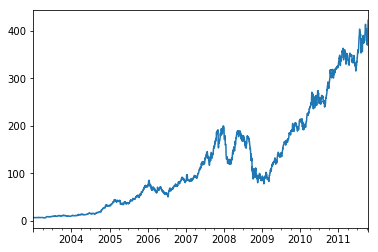

In [203]:
close_px['AAPL'].plot()

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


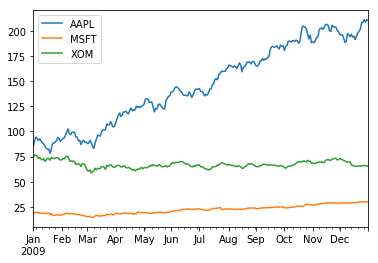

In [204]:
close_px.ix['2009'].plot()

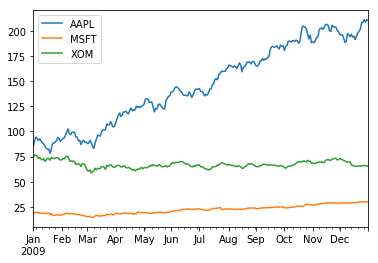

In [205]:
close_px.loc['2009'].plot()

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


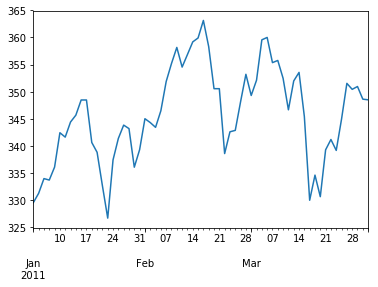

In [174]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

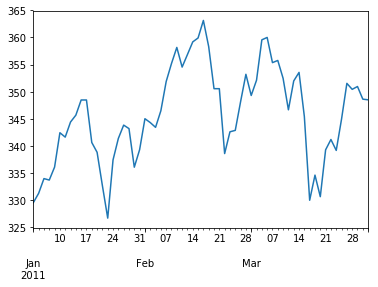

In [206]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.
C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


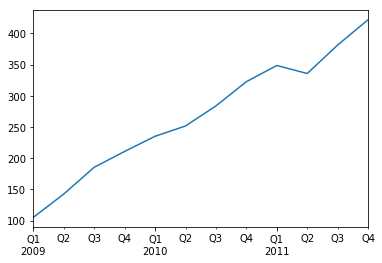

In [175]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q.ix['2009':].plot()

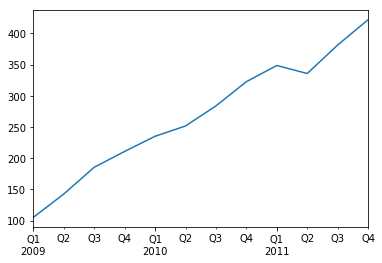

In [207]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot()

## Moving window functions

In [208]:
close_px = close_px.asfreq('B').fillna(method='ffill')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=250).mean()
  


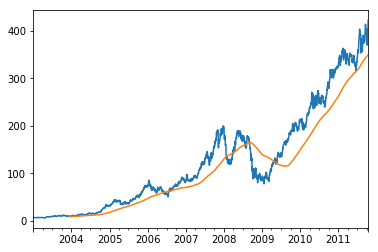

In [209]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()

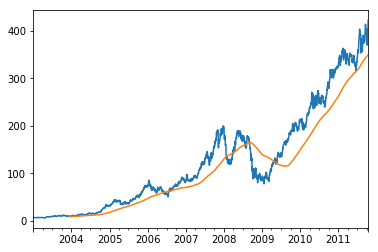

In [212]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [178]:
plt.figure()

In [179]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250[5:12]

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,min_periods=10,window=250).std()
  """Entry point for launching an IPython kernel.


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [214]:
appl_std250 = close_px.AAPL.rolling( 250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

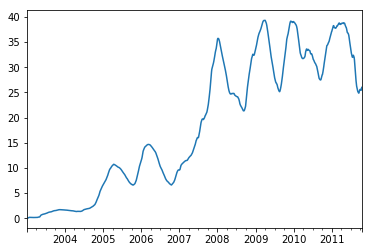

In [215]:
appl_std250.plot()

In [216]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=60).mean()
  """Entry point for launching an IPython kernel.


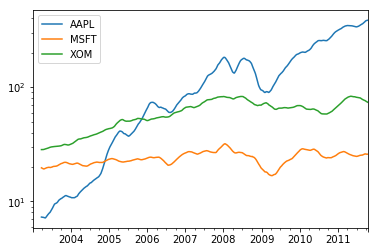

In [217]:
pd.rolling_mean(close_px, 60).plot(logy=True)

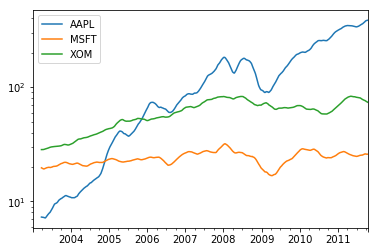

In [218]:
close_px.rolling(60).mean().plot(logy=True)

In [219]:
plt.close('all')

### Exponentially-weighted functions

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60,min_periods=50).mean()
  
C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,ignore_na=False,min_periods=0,adjust=True).mean()
  import sys


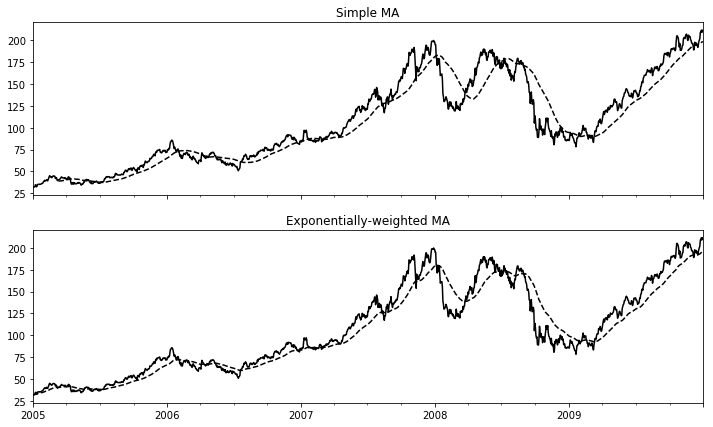

In [220]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

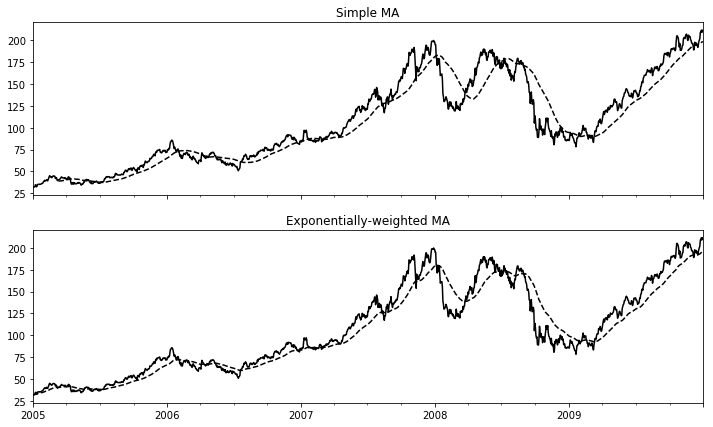

In [223]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = aapl_px.rolling(60, min_periods=50).mean()
ewma60 = aapl_px.ewm(span=60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### Binary moving window functions

In [224]:
close_px
spx_px = close_px_all['SPX']

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=125).corr(other=<Series>)
  This is separate from the ipykernel package so we can avoid doing imports until


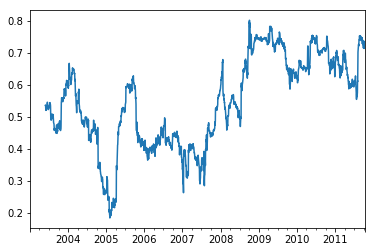

In [225]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

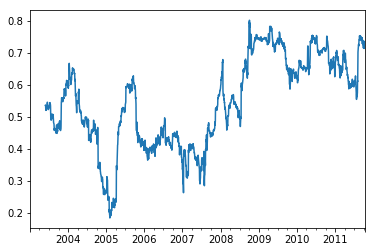

In [230]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=125).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


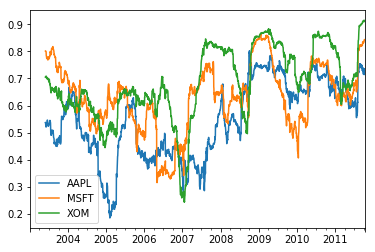

In [187]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

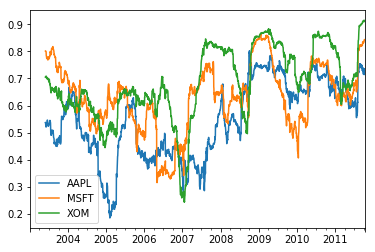

In [231]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-defined moving window functions

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).apply(kwargs=<dict>,args=<tuple>,func=<function>)
  This is separate from the ipykernel package so we can avoid doing imports until


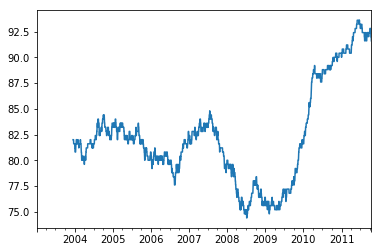

In [188]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

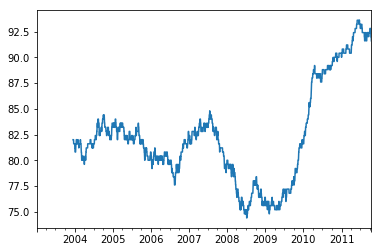

In [232]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

## Performance and Memory Usage Notes

In [233]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000    0.107807
2000-01-01 00:00:00.010   -1.537992
2000-01-01 00:00:00.020   -0.558357
2000-01-01 00:00:00.030    0.459586
2000-01-01 00:00:00.040    0.205621
2000-01-01 00:00:00.050   -0.545743
                             ...   
2000-01-02 03:46:39.940   -0.178703
2000-01-02 03:46:39.950   -0.039832
2000-01-02 03:46:39.960   -1.864533
2000-01-02 03:46:39.970    0.452636
2000-01-02 03:46:39.980    0.028231
2000-01-02 03:46:39.990   -1.237440
Freq: 10L, Length: 10000000, dtype: float64

In [234]:
ts.resample('15min',how='ohlc').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


In [236]:
ts.resample('15min').ohlc().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


In [237]:
%timeit ts.resample('15min', how='ohlc')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:257: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()


125 ms ± 918 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [239]:
%timeit ts.resample('15min').ohlc()

128 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [238]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s', how='ohlc')

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel_launcher.py:257: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()


190 ms ± 3.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [240]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s').ohlc()

183 ms ± 592 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
